# Pull OSM Network to save as nodes and edges

To set-up python and enviornment see: https://geoffboeing.com/2017/02/python-getting-started/

This notebook pulls the walk and drive networks for all the towns within the Boston Region MPO. The the networks are saved as geopackages: nodes are saved as point and edges are saved as lines.

Then this notebook pull the major road network (freeways and primary roads) from OSM for the state of Massachusetts. 


In [1]:
import osmnx as ox
import geopandas as gpd
import networkx as nx
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Part 1: Pull the full Drive and Walk networks for the MPO

### Step 1 Set up Muni names
Pull in the town codes to get a list of municipality names that are part of the MPO.

In [3]:
places= gpd.read_file('data\\town_codes.csv')
mpo = places['MPO']== "Boston" 
places_mpo = places[mpo].reset_index(drop=True)
place_names = places_mpo.TOWN10

### Step 2 Pull Networks by Muni
Pull the drive network and the pedestrian network by municipality for all of the towns in the mpo.

In [4]:
count = 0
full_drive_net = None
full_walk_net = None
for place_name in place_names:
    place = place_name + ', Massachusetts'
    print(count ,': ', place)
    try:
        drive_net = ox.graph_from_place(place, network_type='drive')
        walk_net = ox.graph_from_place(place, network_type='walk')
        if count > 0:
            full_drive_net = nx.compose(full_drive_net, drive_net)
            full_walk_net = nx.compose(full_walk_net, walk_net)
        else:
            full_drive_net = drive_net
            full_walk_net = walk_net
        count+=1
    except Exception:
        print(place,' ','ISSUE')

0 :  Acton, Massachusetts
1 :  Arlington, Massachusetts
2 :  Ashland, Massachusetts
3 :  Bedford, Massachusetts
4 :  Bellingham, Massachusetts
5 :  Belmont, Massachusetts
6 :  Beverly, Massachusetts
7 :  Bolton, Massachusetts
8 :  Boston, Massachusetts
9 :  Boxborough, Massachusetts
10 :  Braintree, Massachusetts
11 :  Brookline, Massachusetts
12 :  Burlington, Massachusetts
13 :  Cambridge, Massachusetts
14 :  Canton, Massachusetts
15 :  Carlisle, Massachusetts
16 :  Chelsea, Massachusetts
17 :  Cohasset, Massachusetts
18 :  Concord, Massachusetts
19 :  Danvers, Massachusetts
20 :  Dedham, Massachusetts
21 :  Dover, Massachusetts
22 :  Essex, Massachusetts
23 :  Everett, Massachusetts
24 :  Foxborough, Massachusetts
25 :  Framingham, Massachusetts
26 :  Franklin, Massachusetts
27 :  Gloucester, Massachusetts
28 :  Hamilton, Massachusetts
29 :  Hingham, Massachusetts
30 :  Holbrook, Massachusetts
31 :  Holliston, Massachusetts
32 :  Hopkinton, Massachusetts
33 :  Hudson, Massachusetts


### Step 3 Save results
Save the full networks as geopackages.

In [5]:
ox.save_graph_geopackage(full_drive_net, "data/mpo_drive_network.gpkg")
ox.save_graph_geopackage(full_walk_net, "data/mpo_walk_network.gpkg")

## Part 2: Pull Major Roads in MA

### Step 1 Pull network with custom filter
Pull major roads for MA using custom OSM tags.
See: 
* https://stackoverflow.com/questions/52231122/python-osmnx-extract-only-big-freeways-of-a-country
* https://stackoverflow.com/questions/61881345/how-to-import-multiple-infrastructure-type-in-osmnx/61897000#61897000

In [90]:
drive_net_primary = ox.graph_from_place('Massachusetts', network_type='drive', custom_filter='["highway"~"motorway|motorway_link|primary"]')

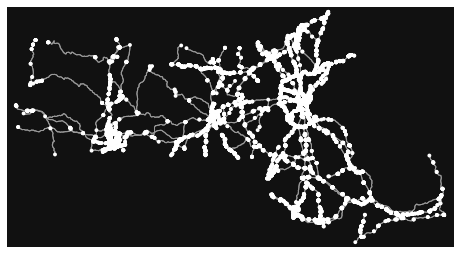

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [91]:
ox.plot_graph(drive_net_primary)

### Step 2 Save Results
Save network and graph.

In [94]:
ox.save_graph_geopackage(drive_net_primary, "data/MA_drive_primary.gpkg")

In [95]:
ox.save_graphml(drive_net_primary, 'data/MA_drive_primary_graph')